## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [12]:

df=pd.read_csv('/content/cardio_train.csv')


## Data Analysis

In [ ]:
# Display first five entries of data

df.head()

In [ ]:
# Display last five entries of data

df.tail()

In [ ]:
# Display random numbers of data

df.sample(10)

In [ ]:
# Show the information of data to find any null value

df.info()

In [ ]:
# Show the statistical summary of data

df.describe()

In [ ]:
# Show the value of taget column

df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
# Drop the id column

df=df.drop(['id'],axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Convert age in year from days

df['age']=(df['age']/365).round(0)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Show correlation between columns

df.corr()

## Data Visualization

Negative (0):  35021
Positive (0):  34979


C:\Users\Rishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


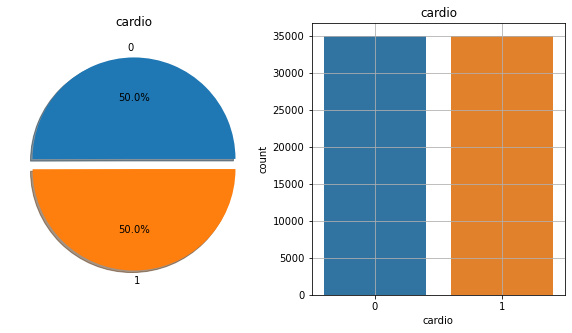

In [ ]:
# Count plot of cardio data

f, ax=plt.subplots(1,2,figsize=(10,5))
df['cardio'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('cardio')
ax[0].set_ylabel('')
sb.countplot('cardio', data=df, ax=ax[1])
ax[1].set_title('cardio')
N,P = df['cardio'].value_counts()
print('Negative (0): ', N)
print('Positive (0): ', P)
plt.grid()
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

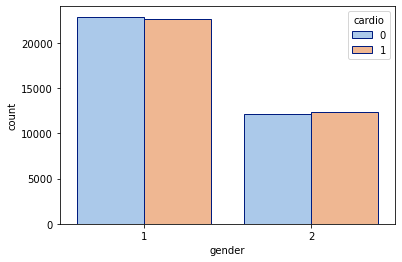

In [ ]:
# Visualize disease rate subjectedly gender

sb.countplot(x='gender',hue='cardio',data=df,palette='pastel',edgecolor=sb.color_palette('dark',n_colors=1))

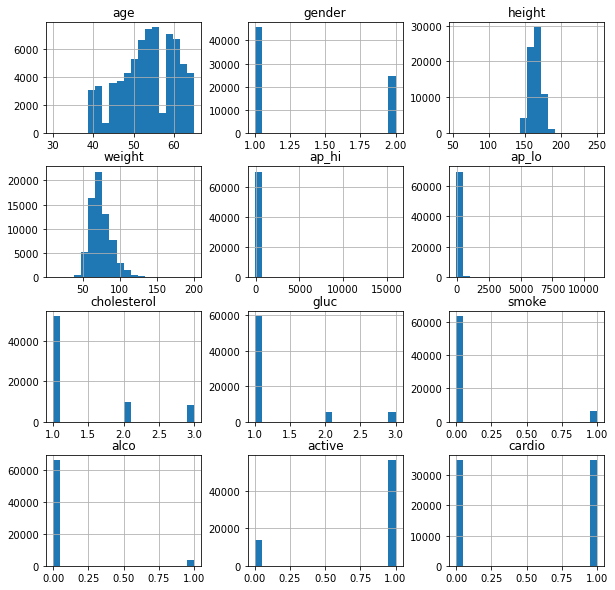

In [ ]:
# Histogram of columns

df.hist(bins=20,figsize=(10,10))
plt.show()

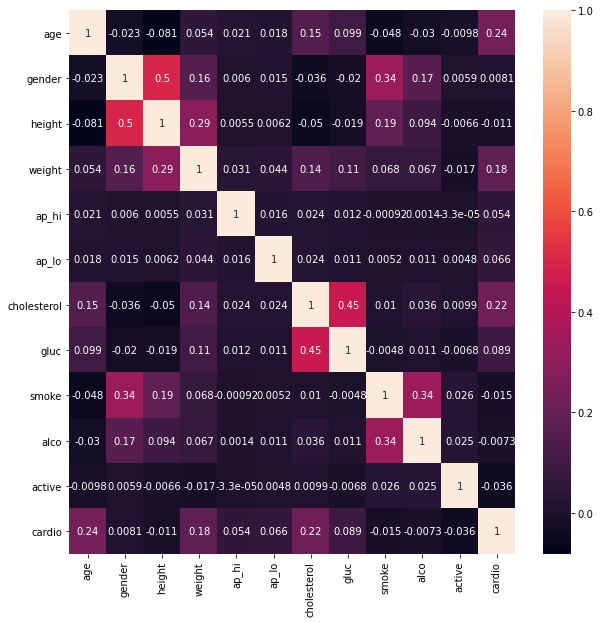

In [ ]:
# Correlation analysis

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map

g = sb.heatmap(df[top_corr_features].corr(), annot=True)

### Split data into x & y

In [ ]:
target_name='cardio'

# Separate object for target feature
y = df[target_name]

# Separate object for input feature
x = df.drop(target_name, axis=1)

In [ ]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.0,2,168,62.0,110,80.0,1,1,0,0,1
1,55.0,1,156,85.0,140,90.0,3,1,0,0,1
2,52.0,1,165,64.0,130,70.0,3,1,0,0,0
3,48.0,2,169,82.0,150,100.0,1,1,0,0,1
4,48.0,1,156,56.0,100,60.0,1,1,0,0,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

### Train Test Split data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,44.0,2,169,71.0,100,80.0,1,1,1,0,1
34858,40.0,1,158,69.0,140,80.0,2,1,0,0,1
54953,56.0,1,164,65.0,120,80.0,1,1,0,0,1
59230,46.0,1,153,53.0,100,60.0,1,1,0,0,1
1730,58.0,1,159,71.0,140,90.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,58.0,2,175,78.0,120,80.0,1,1,0,0,1
20609,52.0,1,164,68.0,120,80.0,1,1,0,0,0
21440,49.0,2,178,82.0,120,80.0,1,1,0,0,1
50057,60.0,1,169,77.0,120,80.0,1,1,0,0,0


In [ ]:
y_train

23561    0
34858    1
54953    0
59230    0
1730     1
        ..
49100    1
20609    0
21440    0
50057    1
5192     1
Name: cardio, Length: 49000, dtype: int64

In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
6670,44.0,1,153,93.0,140,90.0,1,1,0,0,1
49567,40.0,1,157,89.0,120,80.0,1,1,0,0,1
50796,54.0,1,165,66.0,150,90.0,1,1,0,0,1
22310,49.0,2,176,88.0,160,100.0,2,2,1,1,1
54037,46.0,2,165,78.0,140,90.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15691,50.0,1,170,70.0,120,80.0,1,1,0,0,1
25200,58.0,1,165,60.0,120,70.0,3,1,0,0,1
7366,40.0,1,170,68.0,100,60.0,1,1,0,0,1
56399,60.0,1,165,66.0,110,80.0,1,1,0,0,1


In [ ]:
y_test

6670     1
49567    1
50796    1
22310    1
54037    1
        ..
15691    0
25200    1
7366     0
56399    0
31206    1
Name: cardio, Length: 21000, dtype: int64

## Different Classification Algorithms

#### Random Forest Algorithm

In [ ]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(x_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(x_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  97.85510204081632
Test Accuracy score of Random Forest Algorithm  70.5


In [ ]:
prediction = rf.predict([["50","2","168","62","110","80","1","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has no heart disease


In [ ]:
prediction = rf.predict([["55","1","156","85","140","90","3","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has heart disease


#### Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(x_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(x_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  97.85510204081632
Test Accuracy score of Decision Tree Algorithm  63.076190476190476


In [ ]:
prediction = dt.predict([["50","2","168","62","110","80","1","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has no heart disease


In [ ]:
prediction = dt.predict([["55","1","156","85","140","90","3","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has heart disease


#### Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
print("Train Accuracy of Logistic Regression ", lr.score(x_train,y_train)*100)
print("Test Accuracy score of Logistic Regression ", lr.score(x_test,y_test)*100)

Train Accuracy of Logistic Regression  72.32857142857144
Test Accuracy score of Logistic Regression  71.92380952380952


In [ ]:
prediction = dt.predict([["50","2","168","62","110","80","1","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has no heart disease


In [ ]:
prediction = dt.predict([["55","1","156","85","140","90","3","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has heart disease


#### K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print("Train Accuracy of KNN Algorithm ", knn.score(x_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(x_test,y_test)*100)

Train Accuracy of KNN Algorithm  78.0265306122449
Test Accuracy score of KNN Algorithm  68.89047619047619


In [ ]:
prediction = dt.predict([["50","2","168","62","110","80","1","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has no heart disease


In [ ]:
prediction = dt.predict([["55","1","156","85","140","90","3","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has heart disease


#### Naive-Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Train Accuracy of Naive-Bayes Algorithm ", nb.score(x_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes Algorithm ", nb.score(x_test,y_test)*100)

Train Accuracy of Naive-Bayes Algorithm  58.75714285714285
Test Accuracy score of Naive-Bayes Algorithm  58.05714285714285


In [ ]:
prediction = nb.predict([["50","2","168","62","110","80","1","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has no heart disease


C:\Users\Rishad\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [ ]:
prediction = nb.predict([["55","1","156","85","140","90","3","1","0","0","1"]])
if(prediction !=0):
  print("The person has heart disease")
else:
  print("The person has no heart disease")

The person has heart disease


C:\Users\Rishad\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Predicitng Outcome

In [ ]:
# Prediction on test using random forest

rf_pred = rf.predict(x_test)

In [ ]:
# Prediction on test using decision tree

dt_pred = dt.predict(x_test)

In [ ]:
# Prediction on test using logistic regression

lr_pred = lr.predict(x_test)

In [ ]:
# Prediction on test using KNN

knn_pred = knn.predict(x_test)

In [ ]:
# Prediction on test using naive bayes

nb_pred = nb.predict(x_test)

## Confusion Matrix

#### Random Forest Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 7426
FP 2926
FN 3269
TP 7379
Accuracy rate 70.5
Misclassification rate 29.5


<AxesSubplot:>

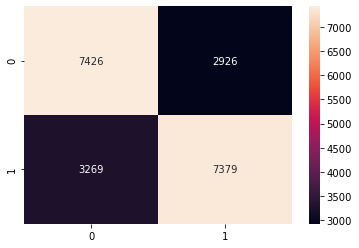

In [ ]:
sb.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt="d")

#### Decision Tree Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 6726
FP 3626
FN 4128
TP 6520
Accuracy rate 63.076190476190476
Misclassification rate 36.923809523809524


<AxesSubplot:>

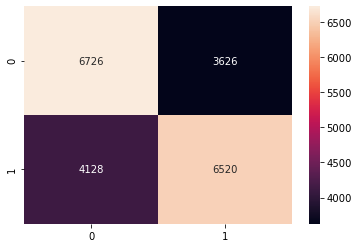

In [ ]:
sb.heatmap(confusion_matrix(y_test, dt_pred), annot=True,fmt="d")

#### Logistic Regretion Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 8001
FP 2351
FN 3545
TP 7103
Accuracy rate 71.92380952380952
Misclassification rate 28.076190476190476


<AxesSubplot:>

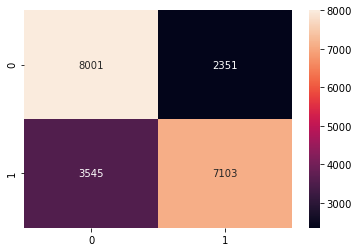

In [ ]:
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

#### K-Nearest Neighbor(KNN) Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 7388
FP 2964
FN 3569
TP 7079
Accuracy rate 68.89047619047619
Misclassification rate 31.109523809523807


<AxesSubplot:>

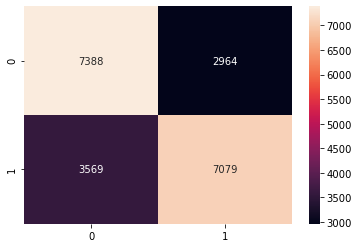

In [ ]:
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True,fmt="d")

#### Naive-Bayes Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 9318
FP 1034
FN 7774
TP 2874
Accuracy rate 58.05714285714285
Misclassification rate 41.94285714285714


<AxesSubplot:>

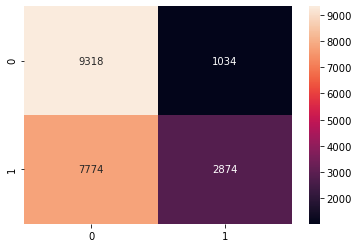

In [ ]:
sb.heatmap(confusion_matrix(y_test, nb_pred), annot=True,fmt="d")